# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 2</font>
## <font color='blue'>Análise de Dados de RH (Recursos Humanos)</font>

## Instalando, Carregando os Pacotes e Conferindo as Versões

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning (Para ignorar os avisos dos desenvolvedores)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Guilherme Paleari" --iversions

Author: Guilherme Paleari

seaborn          : 0.11.1
sys              : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
plotly           : 5.10.0
scipy            : 1.9.1
pandas           : 1.2.4
category_encoders: 2.5.0
missingno        : 0.5.1
numpy            : 1.23.3
matplotlib       : 3.4.3



## Carregando os Dados

In [4]:
# Carrega o dataset
df = pd.read_csv("dataset/aug_train.csv")

In [5]:
# Shape
df.shape

(19158, 14)

In [6]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [9]:
# Descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [10]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Através dessa análise podemos concluir que a maioria dos candidatos estão localizados em cidades bem desenvolvidas.

* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Com essa análise podemos concluir que a mais candidatos com pouca hora de treinamento, entretanto alguns candidatos levam muito tempo para concluir o treinamento.

### Visualizando as Variáveis Categóricas

In [11]:
# Listei as variáveis categóricas 
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

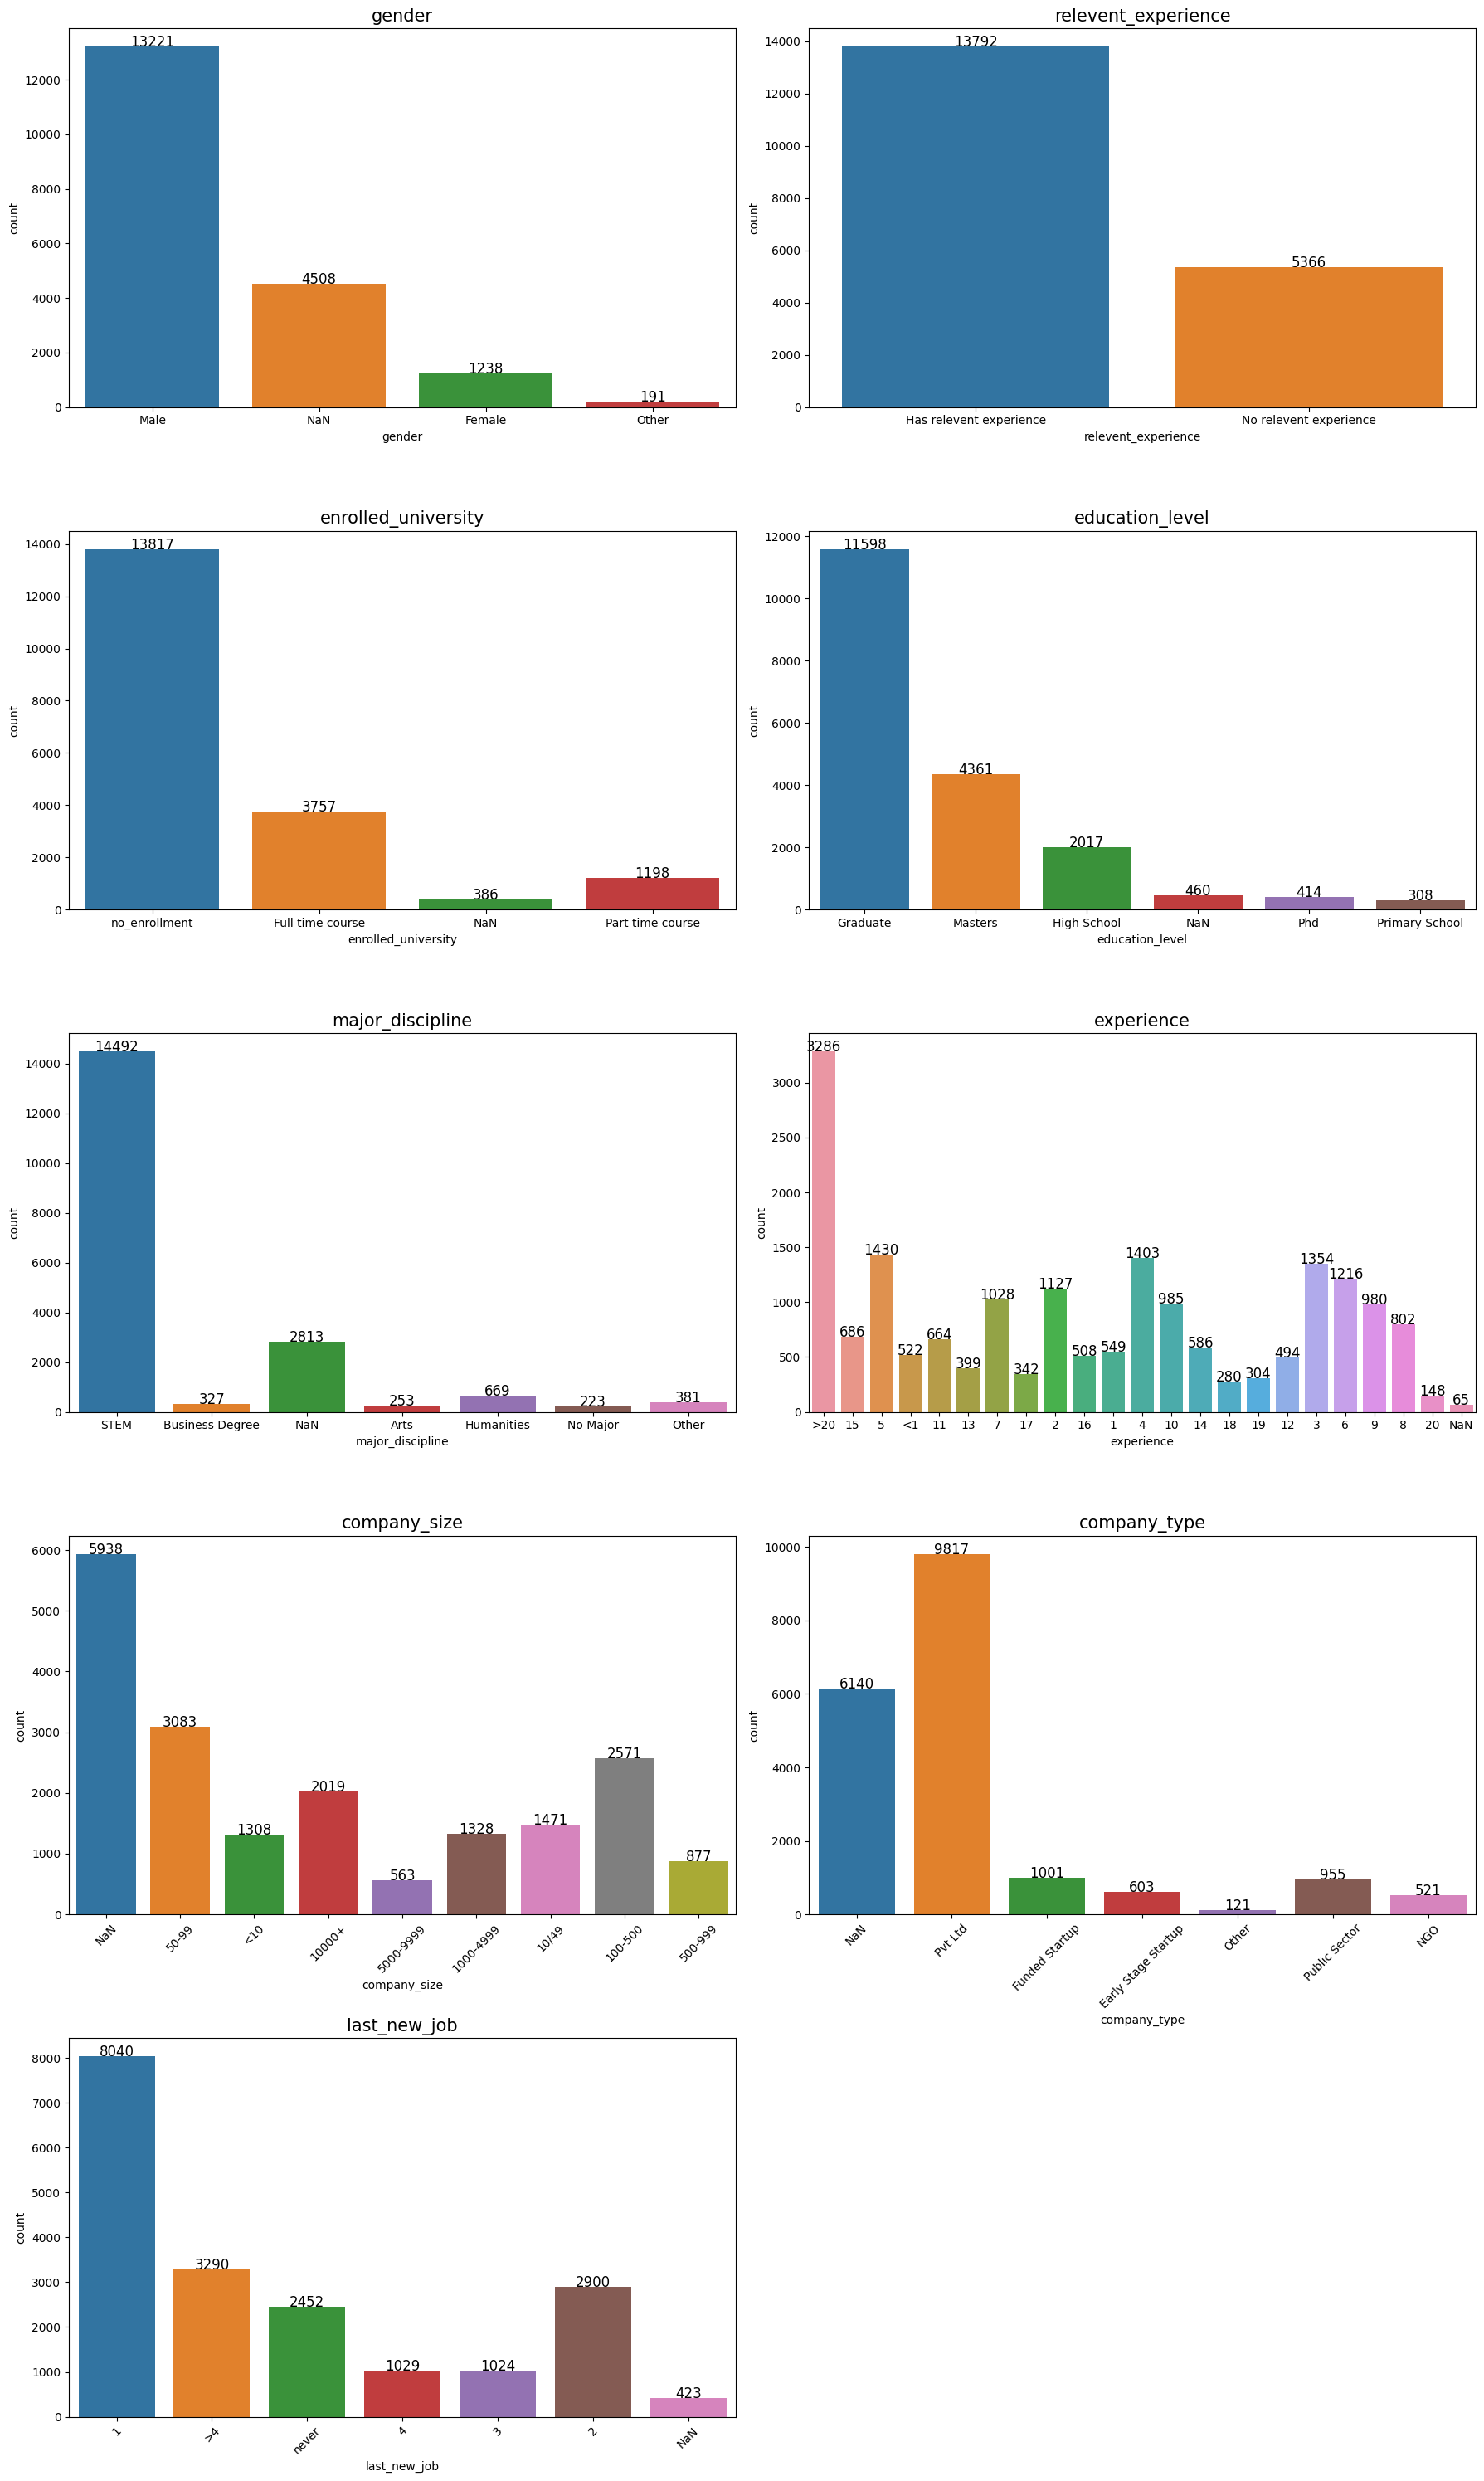

In [12]:
# Criei um gráfico para cada variável para analisar a distribuição das suas categorias

# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas (Atribui a lista de colunas categóricas a uma variável)
column_list = list(df.columns.values)[3:12]

# Iniciei o contador 
A = 0

# Loop For (Aqui criei um gráfico para cada coluna (variável), formatei posição, fonte, tamanho, cor, entre outras coisas para facilitar a análise)
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 1)

### Verificando a Distribuição das Variáveis Numéricas

In [13]:
# Descrevendo os dados numéricos (tirei da visualizaçao essas coluna porque enrollee_id é uma coluna de identificação única dos candidatos
# e target é a coluna alvo do nosso conjunto de dados
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


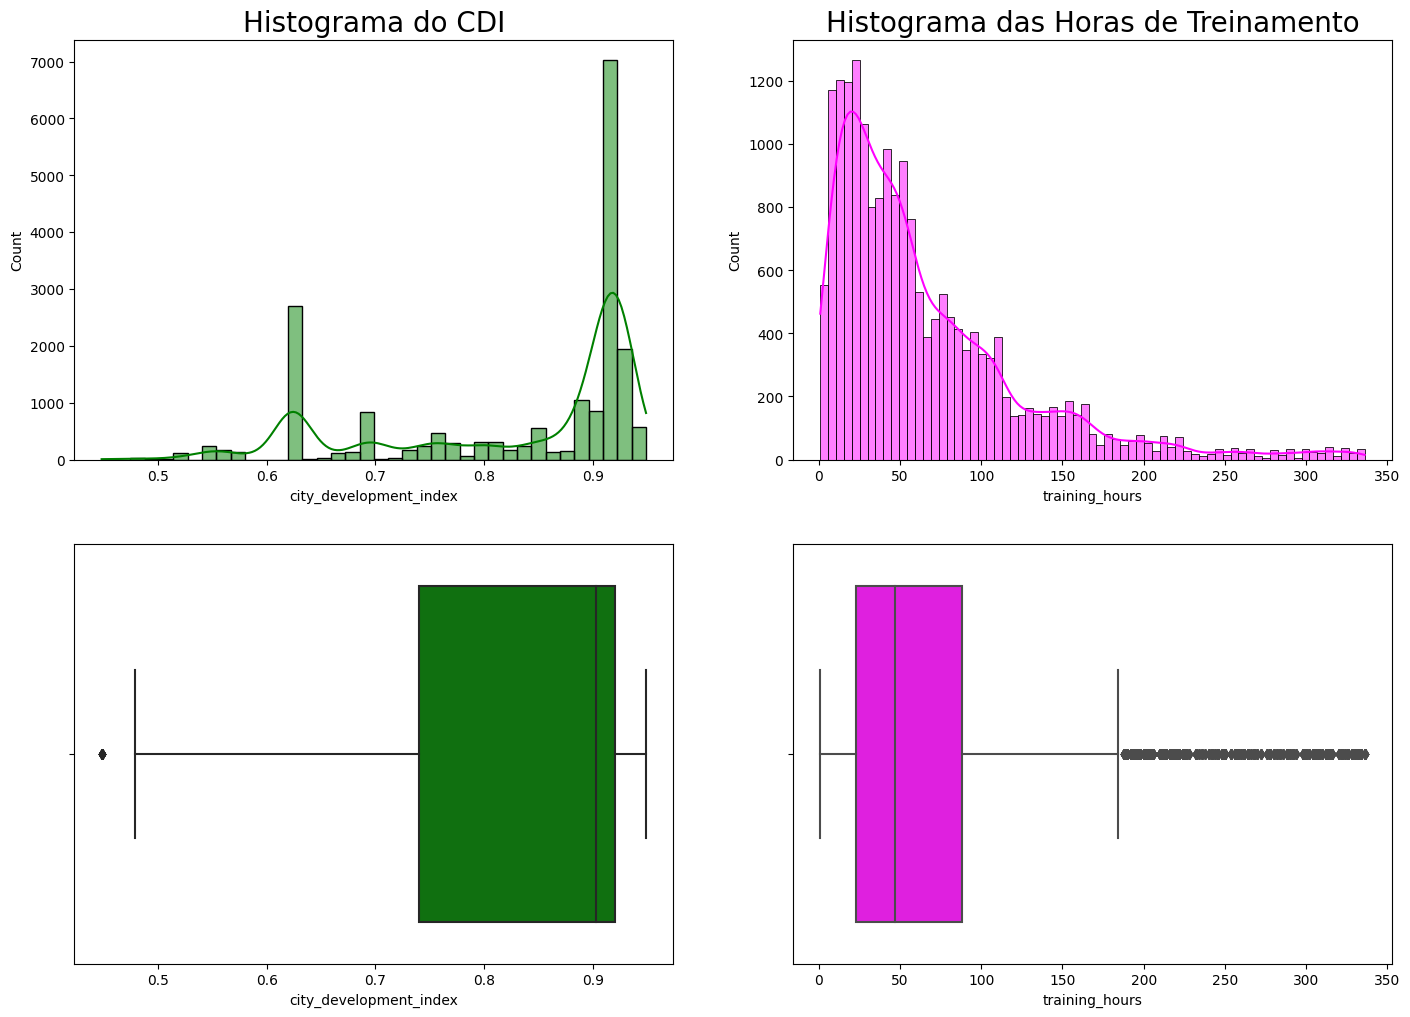

In [14]:
# Figura
plt.figure(figsize = (17,12))

# Abaixo formatatei os subplots com Histograma e Boxplot para realizar a análise da distribuição das variáveis numéricas  

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

## Claramente vemos que as variáveis não seguem uma distribuição normal. Poderia considerar essa informação através desses gráficos acima mas quero validar ainda mais minha suposição realizando um teste estatístico com o pacote scipy

In [15]:
# Esse é um teste de normalidade na qual utilizo a função normaltest() do pacote scipy
# A função normaltest() aplica um teste de hipótese (um dos testes mais usados em análise e estatística)
# Ela valida o que queremos que seria a distribuição normal através de uma regra usada mundialmente que diz o seguinte:
# Se o valor p for maior que 0.05 não há significância estatística para o teste de hipótese

# Lista com as variáveis numéricas (Atribui as variáveis numéricas a uma única variável)
numerical_feature = ['city_development_index', 'training_hours']

# Fazendo um Loop na variável 
for i in numerical_feature:
    
    # Calculando a normalidade das variáveis (vai retornar a estatística e o valor p)
    # Se o valor p é maior do que 0.05, a distribuição é normal, caso contrário não sera normal
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, irei usar o método não paramétrico porque a variável não leva uma distribuição normal.


* Os dados de **training_hours** estão localizados em massa no lado esquerdo do histograma. É esperado porque muitas pessoas começam o treinamento mas nem todo mundo consegue chegar ao final dele e concluí-lo. Já em **city_development_index**, observei que uma grande parte dos candidatos estão concentrados em regiões bem desenvolvidas.

#### Correlação de Spearman (medida não paramétrica) entre variáveis numéricas

Irei analisar a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [16]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [17]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [18]:
# Criei uma cópia do dataframe original
df_numerical = df.copy()

In [19]:
# Contagem das categorias da variável
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [20]:
# Converti a variável experience para numérica
# Onde esta <1 vai ser 1 e onde esta >20 vai ser 21
# Fiz isso para verificar se existe correlação entre as variáveis numéricas
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [21]:
# Observe que transformei a variável para o tipo float
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [22]:
# Fiz a mesma coisa com essa variável para realizar mais a frente a correlação entre as variáveis numéricas
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [23]:
# Converti a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [24]:
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [25]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [26]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [27]:
# Calculando o coeficiente de correlação
# Quando calculo a correlação com o metodo corr(), automaticamente desconsidera as variáveis do tipo object
# Apenas removi a variável "enrollee_id" porque variáveis id não usamos para análise
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


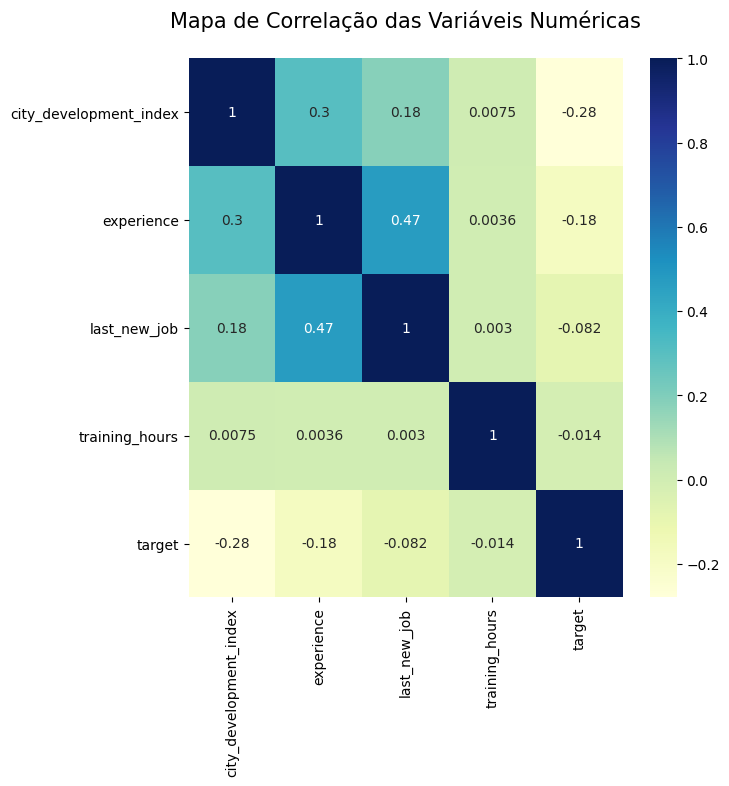

In [28]:
# Calculando o mapa de correlação
# Heatmap (gráfico que identifica padrões nos dados)
# Abaixo segue a formatação do gráfico com o tamanho, cor, título...
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

- A correlação é um coeficiente que vai de -1 a +1 (representado na legenda ao lado direito).
- +1 indica uma alta correlação positiva ou seja, aumenta o valor de uma variável e aumenta o valor da outra.
- -1 indica uma alta correlação nagativa ou seja, aumenta o valor de uma variável e diminui o valor da outra.
- Próximo de 0 indica que não há correlação.

Percebe que a variável **experience** teve uma correlação fraca de 0.3 com a variável **city_development_index** mas claramente a interpretação que posso obter é que profissionais que moram em cidades com alto índice de desenvolvimento, acabam tendo uma experiência maior. 
Depois **experience** teve uma correlação de 0.47 com **last_new_job** que interpretando quer dizer que se a pessoa fica pouco tempo sem trabalhar, ela então acaba adquirindo mais experiência.
**experience** com **training_hours** foi próximo de 0, ou seja, não possui correlação nenhuma.
**experience** com **target** (variável alvo) foi de -0.18 e me leva a crer que se a pessoa tem uma boa experiência, ela não esta porcurando por um novo emprego, o que claramente faz sentido no dia a dia.

Minha análise: 
* Pela correlação de spearman, last_new_job e experience têm correlação média (0.47), enquanto outros têm correlação fraca.

* As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.

* Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

### Weight of Evidence (WOE) e Information Value (IV)

Weight of Evidence (WOE) e Information Value (IV) são duas medidas usadas para analisar a força de uma variável em relação à variável alvo. Explicação detalhada no arquivo WOEeIV.txt encontrado junto ao repositório.

Este Dataset contém mais dados com tipo categórico do que tipo numérico. Usarei recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV na tabela IV abaixo:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, excente

In [29]:
# Fazendo o Loop e removendo as colunas que não queremos analisar que são: as colunas numéricas, o alvo (não quero calcular o alvo com ele mesmo), coluna id (não usamos coluna id para análise),
# coluna city (porque não aparece a cidade, somento o codigo e não tem como saber qual é) e coluna company_size (que representa o Nº total de funcionários na empresa atual e não considero relevante para a análise de RH (um trabalhador não é melhor que o outro só porque está em uma empresa com mais ou menos funcionários))
# As colunas que sobrarem eu fiz crosstab (tabela cruzada) que são usadas para resumir grandes quantidades de dados e em seguida, apresentar o resultado em um formato de tabela estruturada. 
# Nessa tabela, primeiro eu calculo o WOE (fórmula encontrada no arquivo WOEeIV.txt) e depois o IV (observe que o IV é calculado com base no WOE, exatamente igual a fórmula matemática encontrado no arquivo txt)
# Então criei a tabela cruzada que mostra a variável alvo (target) em relação com cada categoria das variáveis categóricas que incluímos para a análise. 
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

Agora é só interpretar o resultado com a tabela IV.
Consigo não só olhar para a variável em si mas para toda categoria dentro dessa variável.
Um exemplo para ajudar a analisar essa tabela seria assim:

Veja a variável **gender**, olhando a coluna **0.0** (que diz que o candidato não procura mudança de emprego) e **1.0** (que diz que procura mudança de emprego), podemos observar uma alta correlação da categoria (**Male**) em relação a variável algo (**target**) do que a categoria (**Female**), porque tem muito mais registro do sexo masculino. Entretanto olhando para a coluna **woe** e **iv** cheguei a conclusão que nenhuma dessas categorias são relevantes para prever o alvo (**target**), por conta do resultado em relação a tabela IV. 

Agora é so reproduzir essa mesma visão nas outras variáveis.

<Figure size 1000x1200 with 0 Axes>

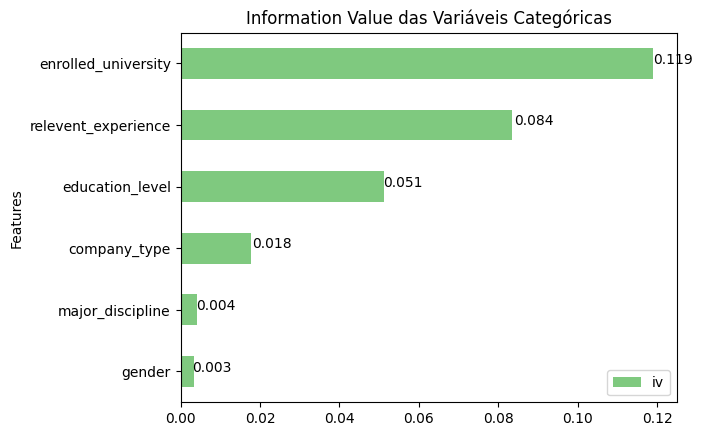

In [30]:
# Criei uma gráfico de plot do Information Value para ter uma interpretação melhor

# Variáveis categóricas (removi as mesmas colunas e atribui a uma variável)
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para colocar o resultado calculado do IV 
iv = []

# Loop (igual tinha feito antes) e adicionei o resultado do iv na lista iv
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Converto para um Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Crio a figura formatando o tipo, tamanho, título, cor e fazendo um loop for com enumerate para colocar as colunas do dataframe com seus devidos valores 
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

Conclusão da análise:
* No gráfico acima,  observamos a ordem dos recursos com base em seu poder preditivo em relação ao alvo (target).
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.
* O gênero do candidato (se é homem ou mulher) não tem relação com sua capacidade mas a intenção com esse teste é gerar essas medidas para comprovar que de fato é irrevelante para nossa análise.
* Observe que `major_discipline` que é a area de graduação do candidato, também não tem correlação direta com aquilo que estou trabalhando nesse projeto que é a variável alvo (`target`).   

### Identificando Valores Ausentes

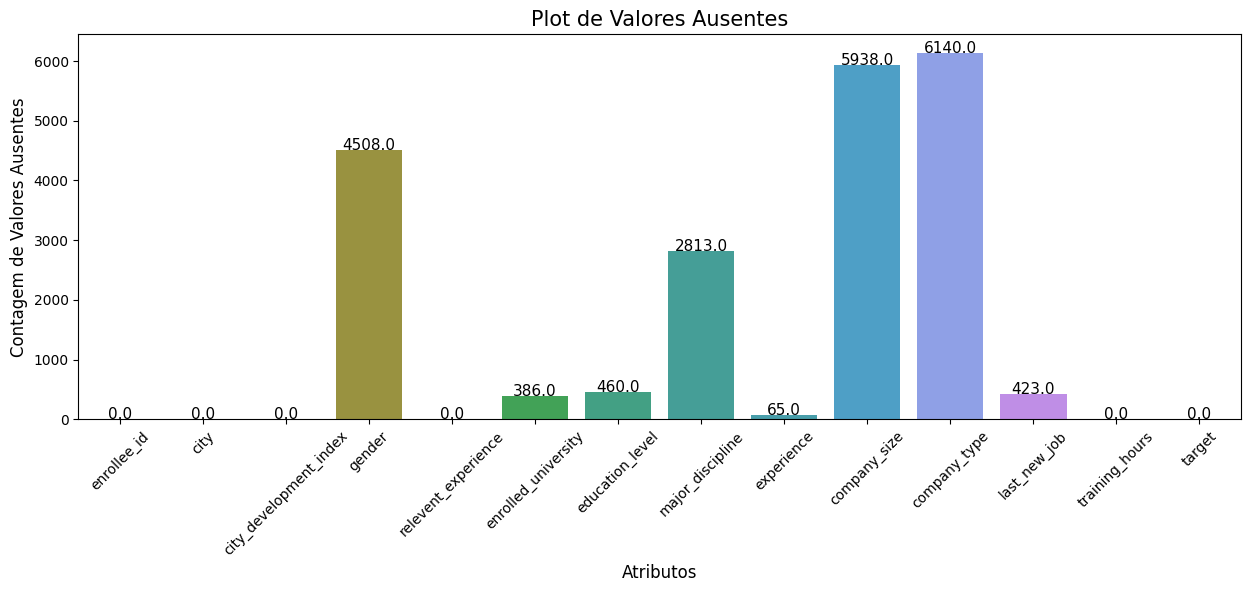

In [31]:
# Valores ausentes por coluna (Filtrando os valores ausentes (NaN) e atribuindo a uma variável)
# o isna() verifica se há ausência de informação 
null_df = df.isna().sum().reset_index()

# Definindo o tamanho da figura
ax = plt.figure(figsize = (15,5))

# Gráfico Barplot (formatei a visualização do gráfico e atribui os valores ao eixo x)
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

No gráfico acima que há ausência nas váriaveis: `gender`, `enrolled_university`, `education_level`, `major_discipline`, `experience`, `company_size`, `company_type` e `last_new_job`.

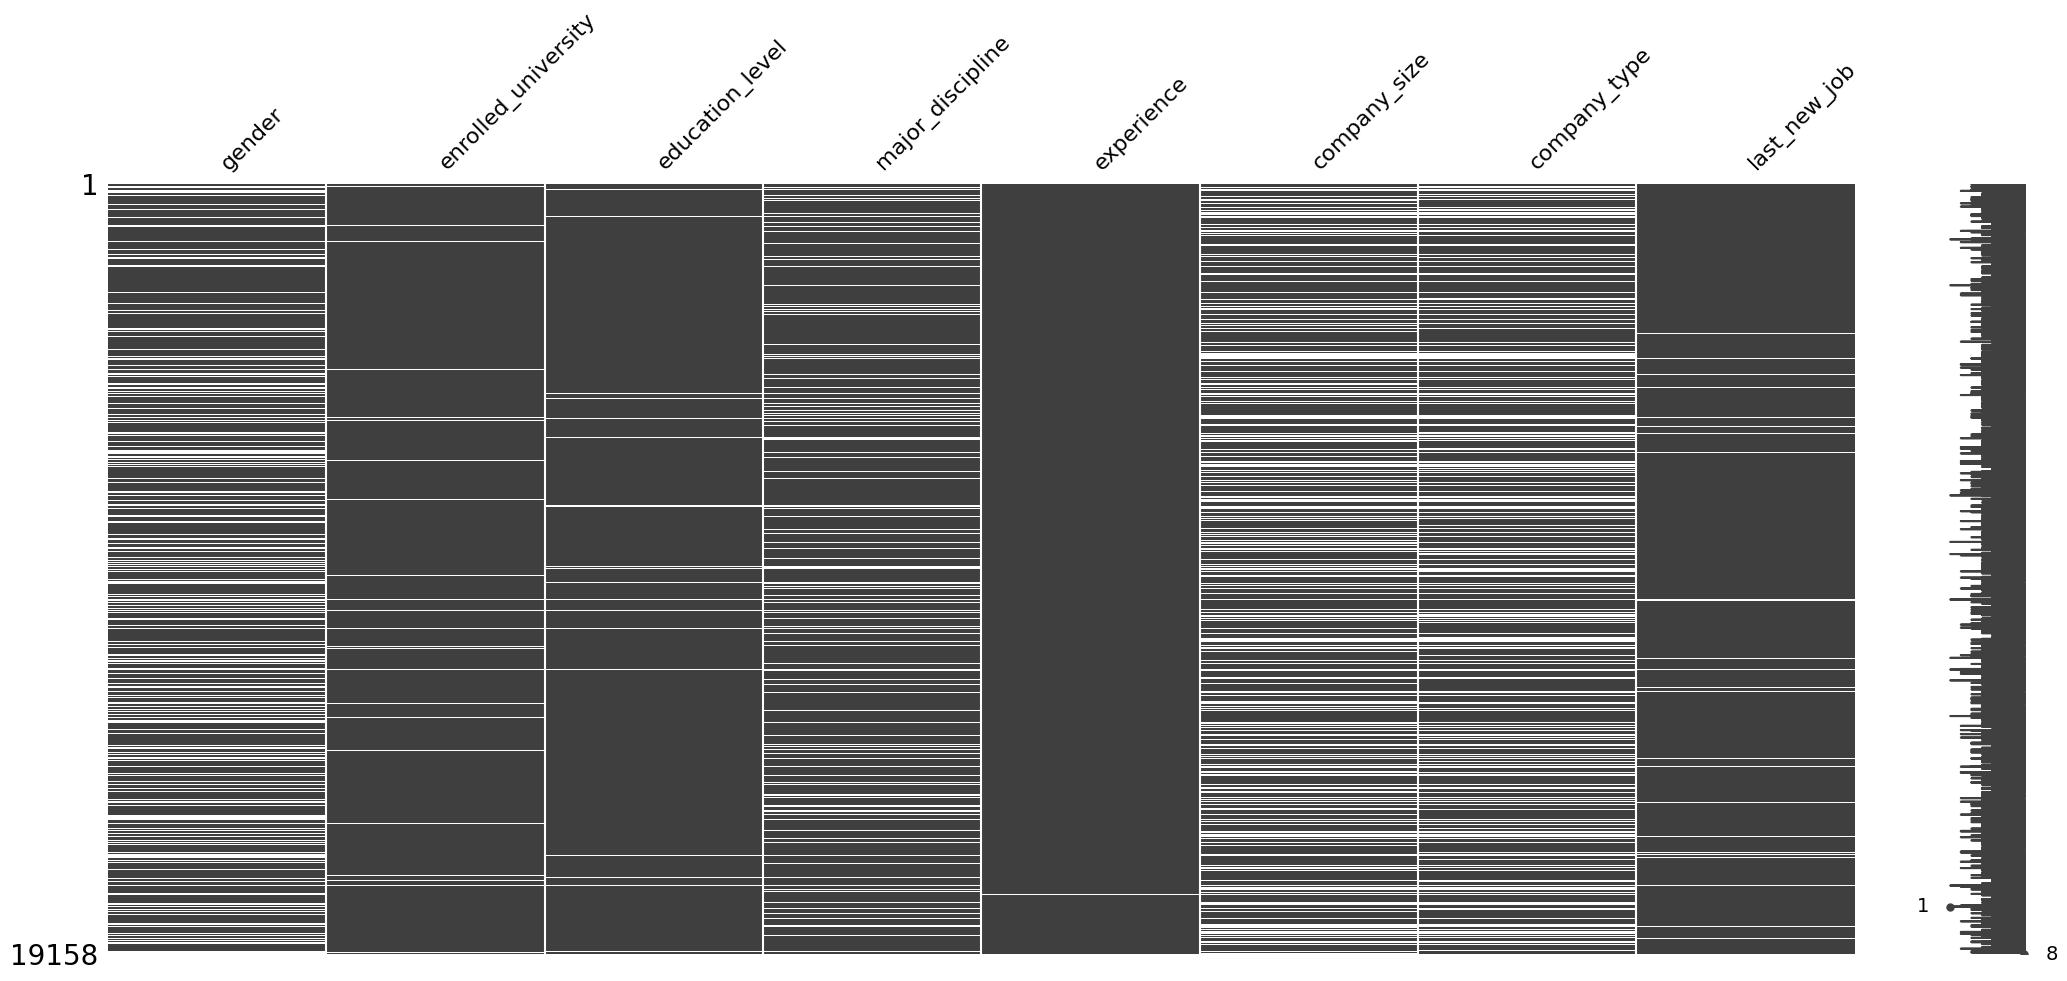

In [32]:
# Gera a visualização

# Coloquei o resultado como um Dataframe do Pandas
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes (Chamei o pacote missigno para criar o mapa de valores ausentes)
# Apenas passei o Dataframe como argumento 
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Esse gráfico mostra se há algum tipo de padrão nos valores ausentes (se tem 5 registro e um valor ausente, mais 5 registro e um valor ausente, e assim sucessivamente).
Neste caso os valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [33]:
# Checando valores duplicados (não há)
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

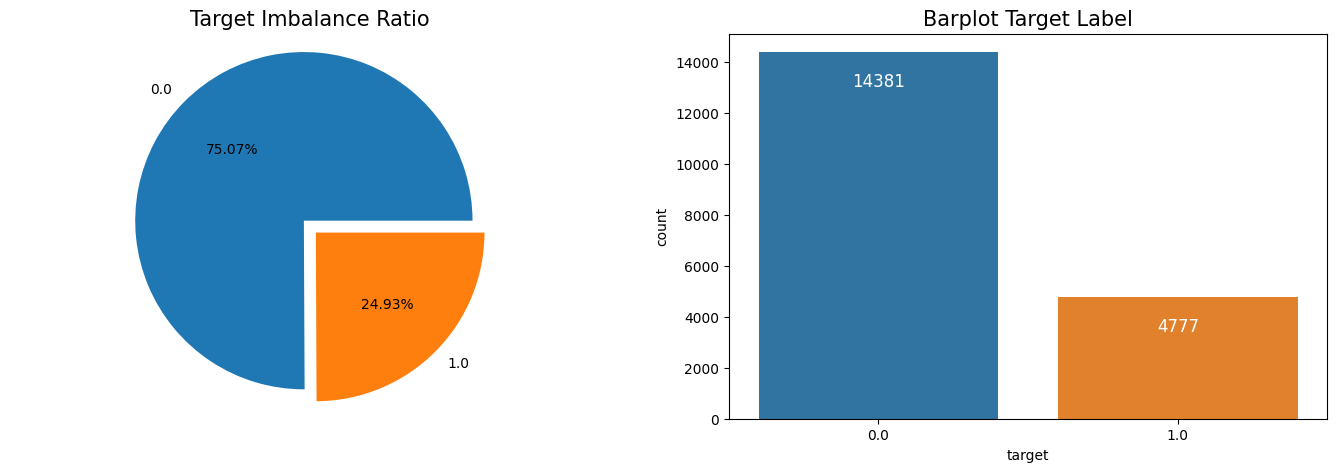

In [34]:
# Formatação da área da figura
plt.figure(figsize = (17,(100)/20))

# Posiçao
plt.subplot(121)

# Grafico de pizza (formatei o gráfico e adicionei os valores)
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

# Posição
plt.subplot(122)

# Gráfico de barras (formatei e adicionei os valores)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

O que esse grafico quer dizer ? 
- **0.0** não estao procurando emprego e **1.0** estão procurando emprego
- Tem muito mais registro aonde o resultado é 0 do que 1, ou seja, essas pessoas que não estão procurando emprego, provavelmente fizeram o curso para desenvolver alguma habilidade, aprender algo novo, buscar um certificado e etc.
- Os dados estão coerentes porque a grande maioria das pessoas que estão empregadas, não estão procurando por emprego mas ainda sim, querem fazer algum curso. Entretanto os dados estão desbalanceados em relação à variável target e pode ser um problema na hora de enterpretar os resultados, porque quando calculamos a correlação (as formas como as variáveis estão relacionadas), obtive muito mais informação de uma classe do que de outra e isso impacta no resultado da análise (principalmente em Machine Learning).
- Para esse projeto não vou precisar tratar isso.

## Limpeza e Processamento dos Dados

Como não há uma regra para realizar a limpeza dos dados, prefiro analisar os dados no seu formato bruto para identificar padrões, eventuais problemas, coisas que preciso modificar mais tarde e assim por diante. 
Se de repente eu fizesse a limpeza primeiro, poderia perder informações que ainda não conheço porque não realizei a análise exploratória dos dados.

### Tratando os Valores Ausentes

In [35]:
# Listando as colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [36]:
# Criando uma lista com as colunas mais relevantes para a análise. Por que escolhi essas colunas ?
# Mantive as variáveis numéricas CDI e experience por conta da correlação delas com a variável target
# Para as variáveis categóricas mantive todas as que estavam no gráfico de IV exceto a variável gender.
# Embora a variável major_discipline tenha um valor de correlação muito baixo em relação com a variável alvo,
# prefiri mantê-la porque prefiro não sair removendo várias colunas de uma vez (porque posso perder a essência entre os dados). Se vejo que não está adequado a minha análise, então descarto.
# E claramente estou incluindo a variável alvo target.
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [37]:
# Filtro o df com essas colunas (descartei todas as outros e vou só trabalhar com essas)
# Criei um novo Dataframe chamado new_df
new_df = df[colunas_manter]

## Comparando as colunas dos Dataframes antigo e atual

In [38]:
# Atual
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [39]:
# Antigo
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


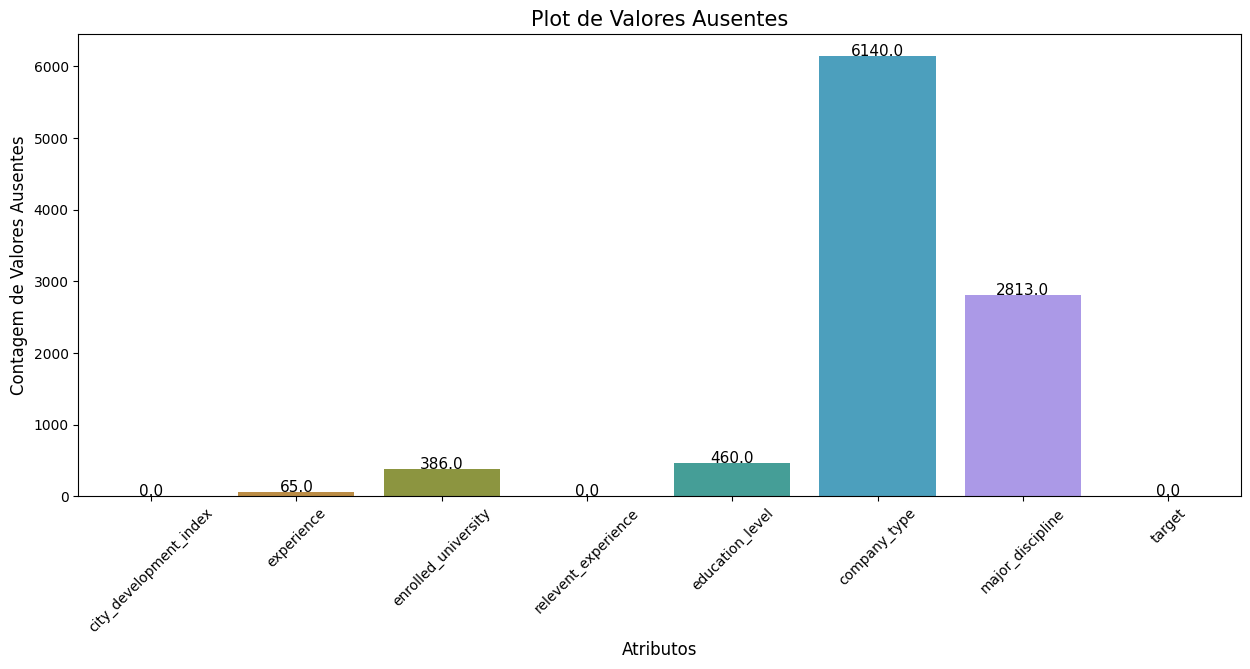

In [40]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

- Observe que apenas 3 variáveis no meu conjunto de dados estão seguindo sem valores ausentes
- 1 variável numérica e outras 4 categóricas com valores ausentes

## Tratando as 5 variáveis do meu conjunto de dados

#### Variável major_discipline (que indica a formação do cantidato)

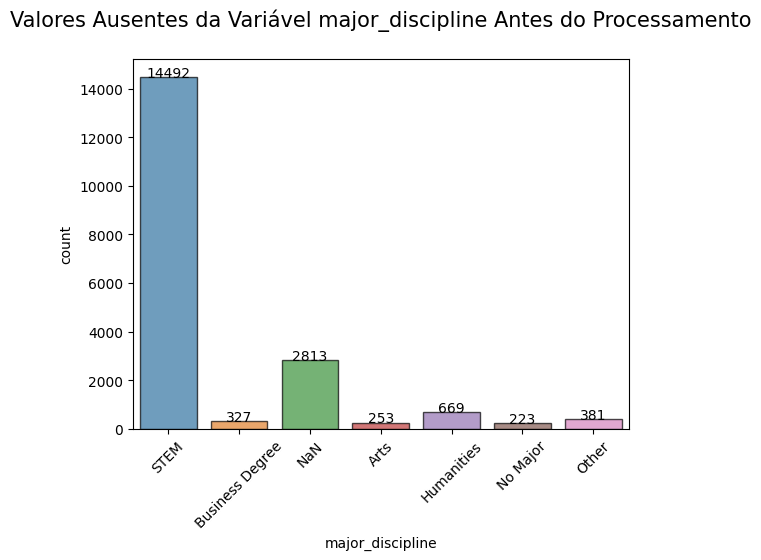

In [41]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
# Criei um gráfico de barras (countplot), preencho os valores ausentes (fillna()) com o termo 'NaN', coloco a variável major_discipline no eixo x para mostrar todas as categorias
# O restante é tudo formatação do gráfico 
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

- Podemos observar que **STEAM** compreende a maioria dos registros mas tem valores NaN na coluna verde

In [42]:
# Tem 2813 registros no total de valores ausentes
new_df['major_discipline'].isna().sum()

2813

In [43]:
# Relação entre major_discipline x education_level
# Eu tenho 2813 valores ausentes na variável major_discipline e dentre esses valores ausentes dividi os valores das categorias da variável education_level
# Abaixo mostra exatamente os valores NaN de major_discipline distribuidos nas categorias de education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Irei realizar o preenchimento dos valores NA da variável `major_discipline` com `Non Degree` (não tem graduação) nas categorias **High School** e **Primary School** da variável `education_level`

- Dicidi fazer isso porque não tem como alguém ter especialização e graduação (regra do mundo) no high school (ensino médio) e primary school (escola primária)

In [44]:
# Vou buscar os registros que major_discipline for NA e education_level for igual a High School ou education_level igual a NA ou education_level igual a Primary School
# Obtive esse filtro converti no índice e coloquei tudo na variável nan_index
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [45]:
# Comprimento do índice
len(nan_index)

2785

In [46]:
# Imputação do valor ausente (baseado no critério que adotei anteriormente)
# Vou buscar apenas os registros o índice da variável nan_index que tem a regra que determinamos anteriormente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [47]:
# Realizei a imputação só que sobraram ainda 28 registros com valores ausentes
# Esses 28 talvez tenham o major, então não por isso não posso adotar a mesma regra
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

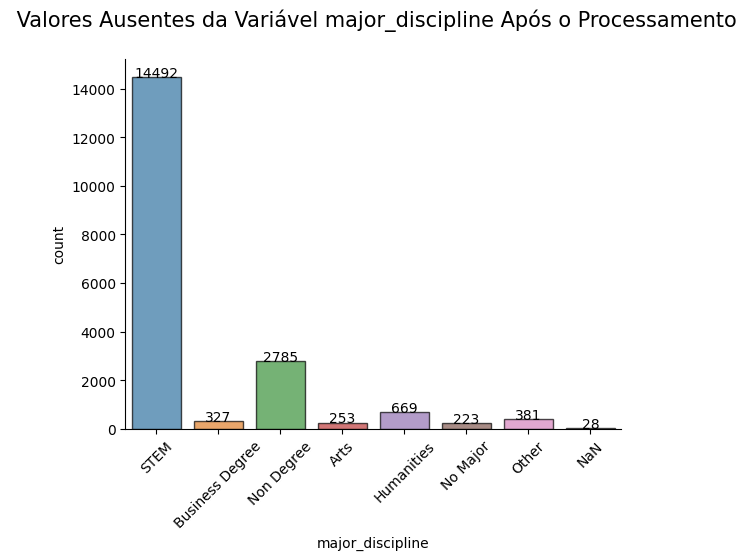

In [48]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [49]:
# Para os valores ausentes restantes vou preencher com 'Other' (outro)
new_df[new_df['major_discipline'].isna()]  = 'Other'

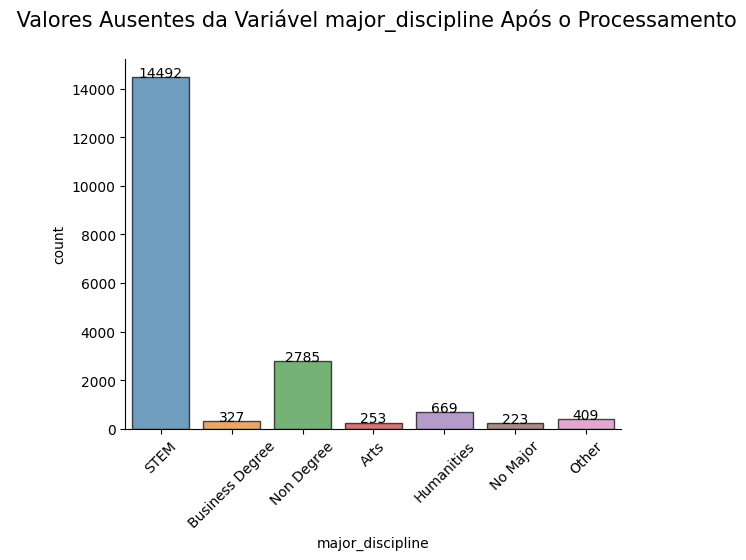

In [50]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

OBS: Eu poderia ter colocado todo o valor do **NaN** desde o começo para Other mas existe uma regra de negócio que diz o seguinte: `Não tem como alguém ter especialização e graduação no high school e primary school`. Então o ideal seria tratar isso antes realizando a imputação desses dados (como fiz) e depois o que sobrou ai sim imputar para **Other** 

In [51]:
# Checando os dados
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university (que indica se o candidato está ou não matriculado em um curso universitário)

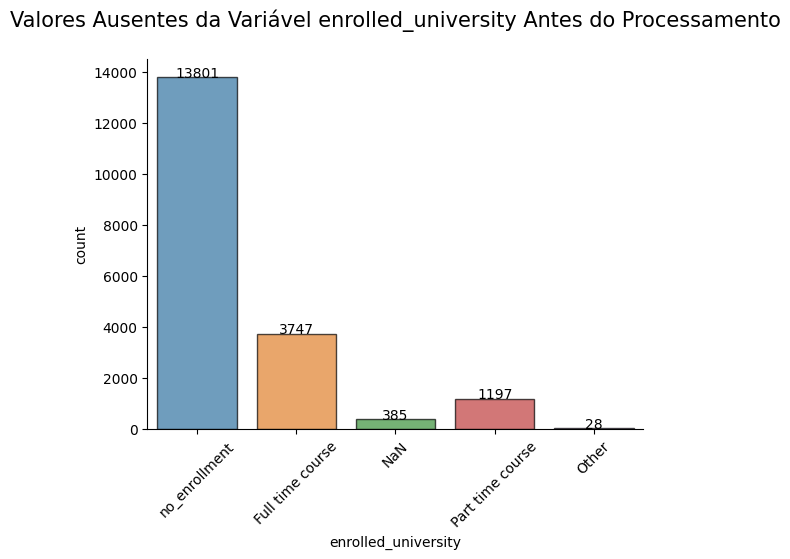

In [52]:
# Gráfico de barras (countplot), segue o mesmo formato, apenas troquei a variável
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation = 45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [53]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Mais uma regra adotada mundialmente na qual aplicamos nos candidatos com `Primary School` como `education_level`, eles não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.

In [54]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [55]:
# Comprimento do índice
len(nan_index)

9

In [56]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [57]:
# Com os valores imputados, ainda me sobraram 376 registros duplicados
# Não tem nenhuma regra mais para considerar 
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [58]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [59]:
# O restante dos valores ausentes colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

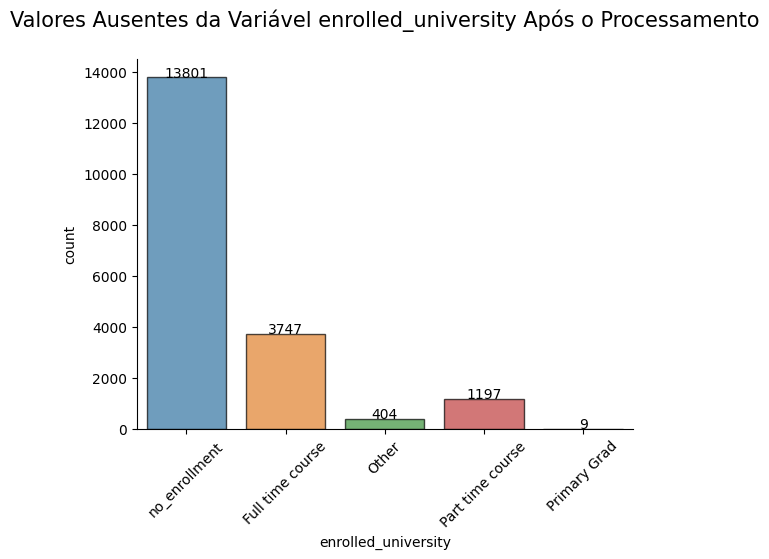

In [60]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation = 45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

OBS: Eu poderia ter colocado todo o valor do **NaN** desde o começo para Other mas existe uma regra de negócio que diz o seguinte: `Se a pessoa tem Primary School ela não pode engressar em uma universidade`. Então o ideal seria tratar isso antes realizando a imputação desses dados (como fiz) e depois o que sobrou ai sim imputar para **Other** 

In [61]:
# Checando os dados para saber se não deu algum problema
new_df.head(15)

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0
5,0.764,11,Part time course,Has relevent experience,Graduate,NaN,STEM,1.0
6,0.92,5,no_enrollment,Has relevent experience,High School,Funded Startup,Non Degree,0.0
7,0.762,13,no_enrollment,Has relevent experience,Graduate,Pvt Ltd,STEM,1.0
8,0.92,7,no_enrollment,Has relevent experience,Graduate,Pvt Ltd,STEM,1.0
9,0.92,17,no_enrollment,Has relevent experience,Graduate,Pvt Ltd,STEM,0.0


#### Variável company_type (que indica o tipo de empresa que o canditato está trabalhando)

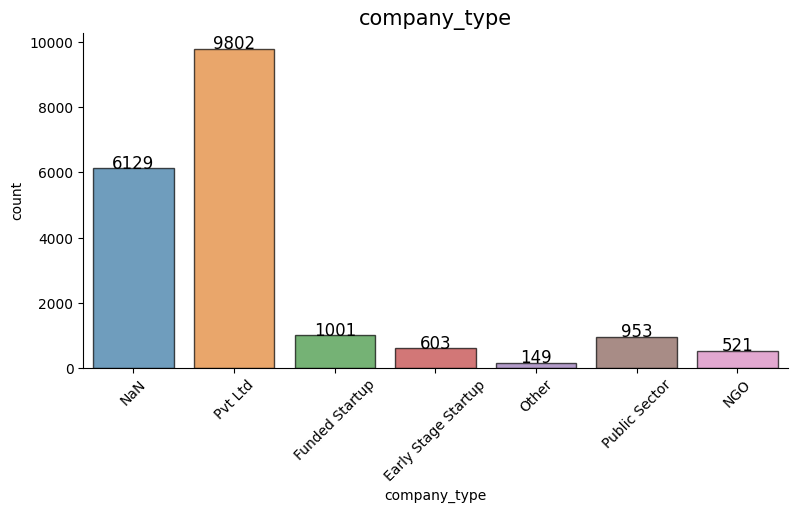

In [62]:
# No gráfico de barras formatei o tamanho, posição, valores, título, tamanho da fonte, cor, rotação do fonte do eixo x entre outras coisas
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

- Os valores **NaN** aparecem como a segunda categoria com mais registros ou seja eu não tenho informação para 6129 registros

In [63]:
# Contagem de registros das categorias da variável company_type
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [64]:
# Criei o índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [65]:
# Decidi imputar os valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

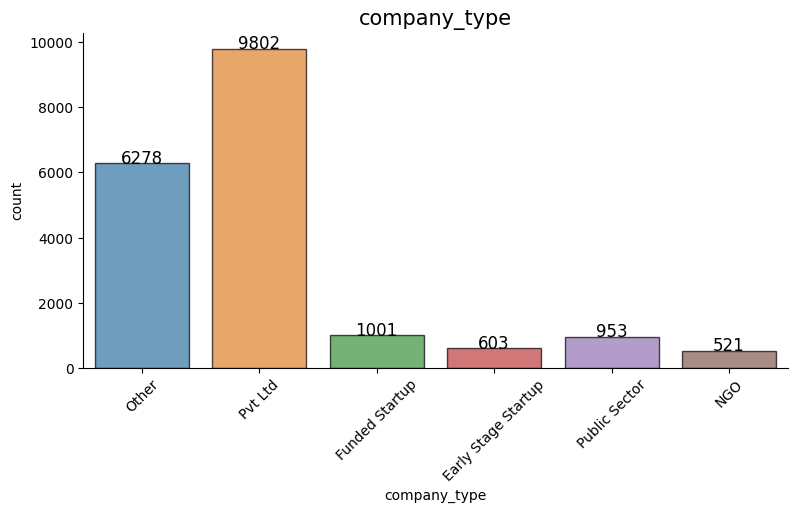

In [66]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

- O único problema é que **Other** ficou como a segunda maior categoria mas não tem o que fazer nesse caso. O certo aqui seria pedir pra equipe que coleta dados ou do sistema de cadastros para eventualmente exigir que esse campo seja preenchido pelo candidato na hora que for preencher a ficha.
- Hoje é o que temos então vamos seguir analisando assim mesmo

In [67]:
# Checando os dados 
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level (que indica o nível de escolaridade do candidato)

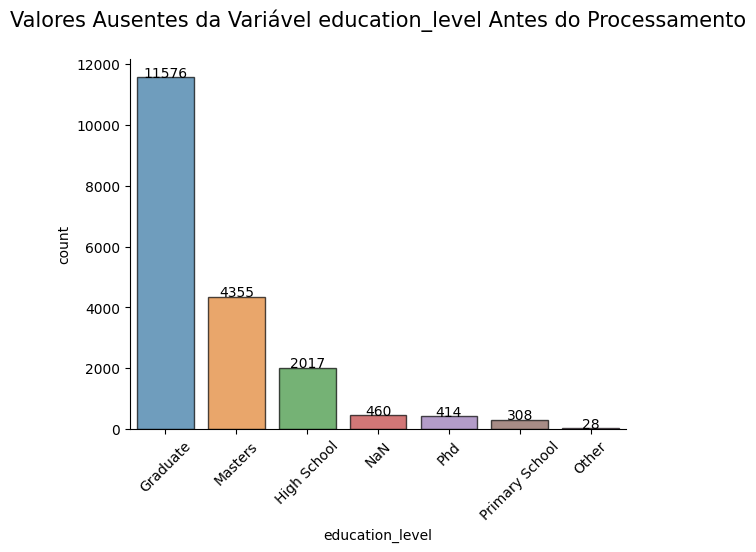

In [68]:
# Gráfico de barras com a mesma formatação dos gráficos anteriores, apenas trocando a variável
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation = 45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

Minha decisão:
- Eu poderia tentar fazer todo circuito de validação dessa variável com as outras variáveis (como fiz com as anteriores);
- Tentaria criar algum tipo de regra específica conversando com a área de negócio.
-`Para esse projeto vou adotar o padrão genérico, criar o índice com os valores ausentes e preencher com a categoria` **Other**

In [69]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [70]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

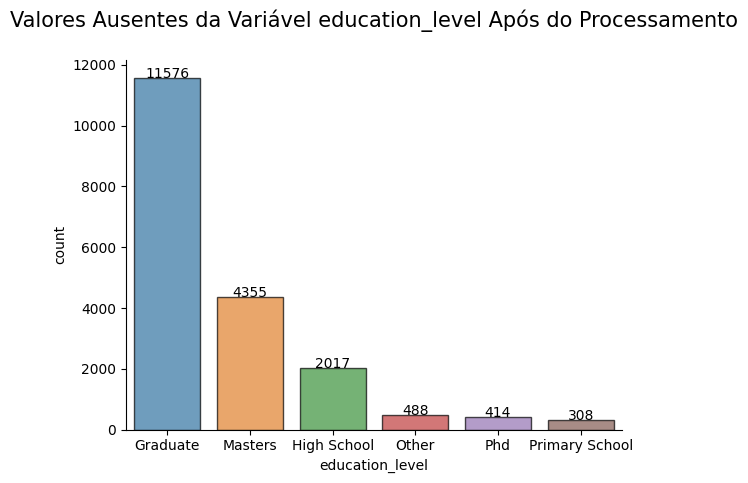

In [71]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

In [72]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience (que representa o tempo total em anos de experiência de cada candidato)

In [73]:
# Eu converti essa variável para tipo numérico no começo para realizar os calculos na matriz de correlação e descobri que ela tem uma
# correlação razoável com a variável alvo. Só que quando fiz a copia dessa variável para esse novo Dataframe (new_df), ela veio como tava ante em formato categórico.

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   company_type            19158 non-null  object
 6   major_discipline        19158 non-null  object
 7   target                  19158 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [74]:
# Poderia converter ela novamente para o formato numérico e tratar os registros >20 e <1 mas vou mantê-la desse jeito e tratar os valores ausentes
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [75]:
# Percentual de valores ausentes (0.32%, ou seja, são poucos registros para tratar)
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [76]:
# 63 registros ausentes
new_df['experience'].isnull().sum()

63

In [77]:
# 63 registros ausentes sobre 19158 que é o total de linhas
new_df.shape

(19158, 8)

In [78]:
# Dropna() vai remover os registros ausentes do conjunto de dados. Normalmente quando é muito pouco registro adoto essa estratégia para ser prático
# Como uma boa prática analiso o seguinte: Se tiver 50% ou mais de valores ausentes eu descarto a variável. Menos de 50% vale a pena realizar algum tipo de análise para então realizar algum tipo de tratamento de valores ausentes.
# Agora se tiver menos de 2% de valores ausentes, apenas deleto os registros.
new_df = new_df.dropna()

In [79]:
new_df.shape

(19095, 8)

In [80]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

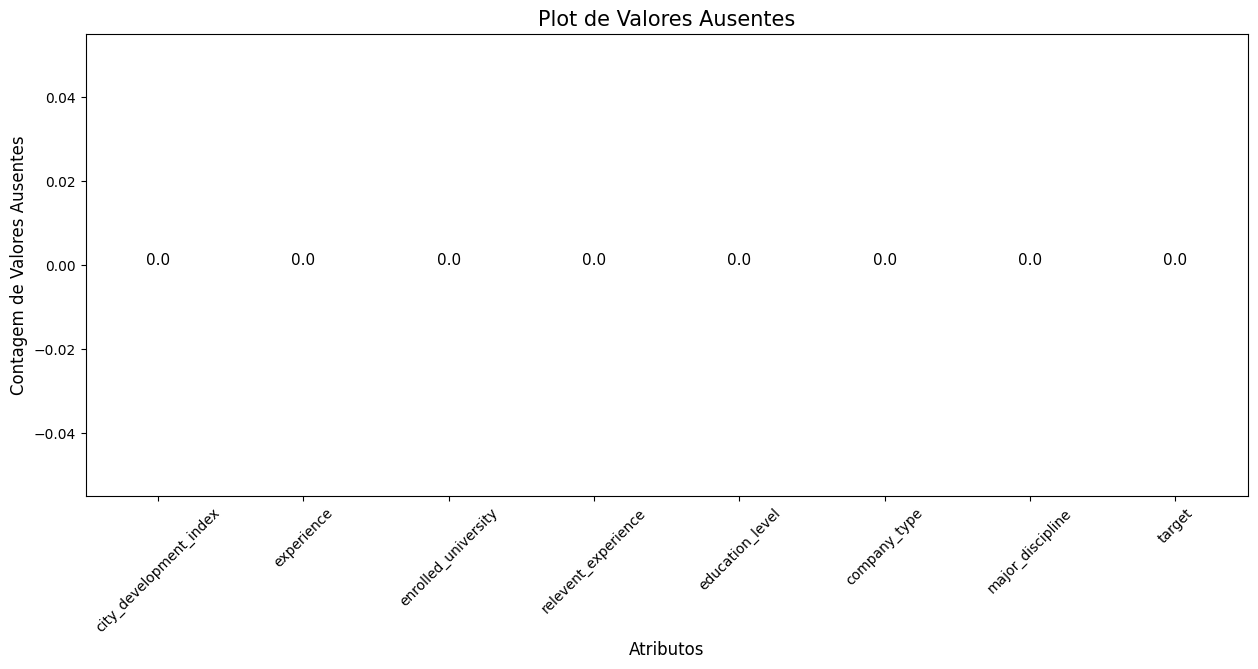

In [81]:
# Valores ausentes por coluna do meu conjunto de dados
null_df = new_df.isna().sum().reset_index()

# Tamanho da figura
ax = plt.figure(figsize = (15,6))

# Gráfico Barplot (formatei o eixo x e y do gráfico, tamanho e adicionei os dados do Dataframe)
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Ajustes Finais

In [82]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [83]:
# Ajustando os dados (aonde tiver minúsculo, coloquei maiúsculo)
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [84]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [85]:
# Dividi as variáveis em x e y na qual x representa a variável de entra e y a de saída 
# Estudo y com base naquilo que tenho em x
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

Com base na minha análise observei que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- A especialização na graduação (quando for o caso).
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- Se está ou não matriculado em um curso universitário.

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.

# Fim